# Part 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import a package for using dikstra's algorithm
import networkx as nx

In [2]:
# Function that reads file and save each line as a list
def read_file(filename):
    with open(filename) as f:
        content = f.readlines()
    content = [x.strip() for x in content]
    return content

In [3]:
def find_start_end(heightmap):
    tmp_heightmap = heightmap.copy()
    # Find the S character, save it's coordinates and replace it with an 'a'
    for i, row in enumerate(heightmap):
        for j, letter in enumerate(row):
            if letter == 'S':
                start = (i, j)
                tmp_heightmap[i] = row[:j] + 'a' + row[j+1:]
                break
    # Find the E character, save it's coordinates and replace it with a 'z'
    for i, row in enumerate(heightmap):
        for j, letter in enumerate(row):
            if letter == 'E':
                end = (i, j)
                tmp_heightmap[i] = row[:j] + 'z' + row[j+1:]
                break

    return start, end

In [4]:
# Convert the heightmap to a numpy array of integers
def convert_to_array(input):
    heightmap = np.zeros((len(input), len(input[0])))
    for i, row in enumerate(input):
        for j, c in enumerate(row):
            # If c is an "S", replace with an "a"
            if c == "S":
                heightmap[i, j] = ord("a") - ord("a") + 1
            # If c is an "E", replace with a "z"
            elif c == "E":
                heightmap[i, j] = ord("z") - ord("a") + 1
            # Otherwise, replace with the elevation of the letter
            else:
                heightmap[i, j] = ord(c) - ord("a") + 1
    return heightmap

In [22]:
# Convert heightmap to a Graph
def convert_to_graph(heightmap):
    G = nx.DiGraph()
    for i in range(heightmap.shape[0]):
        for j in range(heightmap.shape[1]):
            node = (i, j)
            G.add_node(node, height=heightmap[i, j])
            neighbors = [(i + dx, j + dy) for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]]
            for neighbor in neighbors:
                if 0 <= neighbor[0] < heightmap.shape[0] and 0 <= neighbor[1] < heightmap.shape[1]:
                    height_difference = heightmap[neighbor] - heightmap[node]
                    if height_difference <= 1:
                        G.add_edge(node, neighbor, weight=1)
    return G

In [23]:
                    # if height_difference <= 1:
                    #     G.add_edge(node, neighbor, weight=1)

## With test input

In [24]:
# Example usage
test_input = read_file('test_input.txt')

# Find the start and end coordinates
test_start, test_end = find_start_end(test_input)

print(test_input)

['Sabqponm', 'abcryxxl', 'accszExk', 'acctuvwj', 'abdefghi']


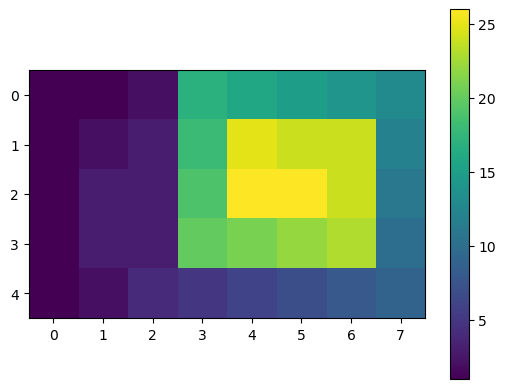

In [25]:
# Plot the heightmap with a colormap of each letter representing its elevation
test_heightmap = convert_to_array(test_input)

plt.imshow(test_heightmap, cmap="viridis")
plt.colorbar()
plt.show()

[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (3, 7), (2, 7), (1, 7), (0, 7), (0, 6), (0, 5), (0, 4), (0, 3), (1, 3), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (2, 6), (1, 6), (1, 5), (1, 4), (2, 4), (2, 5)]


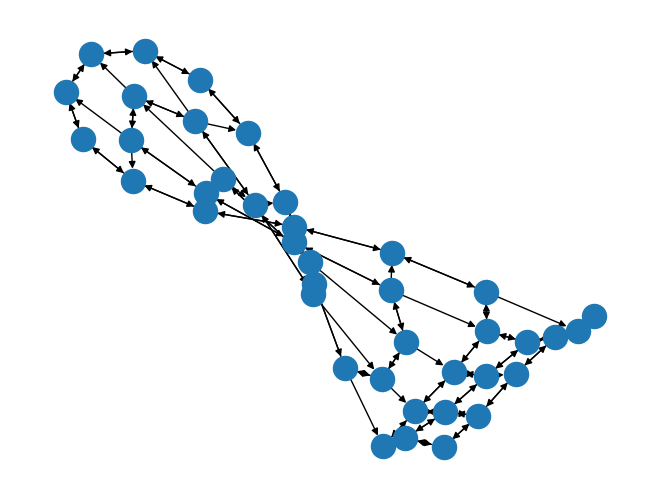

In [26]:
# Convert the test heightmap to a graph
G_test = convert_to_graph(test_heightmap)
nx.draw(G_test)

# Find the shortest path from the start to the end but you can only move to a neighbor if the difference in elevation is less than or equal to 1
path_test = nx.shortest_path(G_test, test_start, test_end, weight="height")
print(path_test)

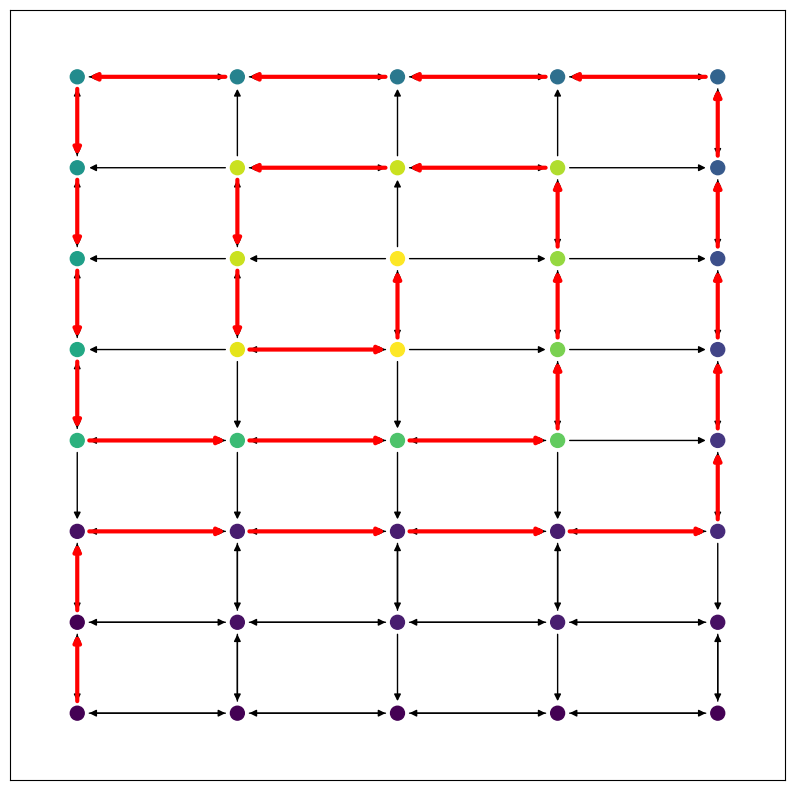

In [27]:
# Function to plot the graph with the shortest path highlighted with arrows indicating the direction and a colormap of each node's elevation
def plot_graph(G, path):
    plt.figure(figsize=(10, 10))
    pos = {node: node for node in G.nodes}
    nx.draw_networkx_nodes(G, pos, node_size=100, node_color=[G.nodes[node]["height"] for node in G.nodes], cmap="viridis")
    nx.draw_networkx_edges(G, pos, width=1)
    # nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, "height"))
    nx.draw_networkx_edges(G, pos, edgelist=[(path[i], path[i + 1]) for i in range(len(path) - 1)], width=3, edge_color="r", arrows=True)
    plt.show()

# Plot the test graph with the shortest path
plot_graph(G_test, path_test)

In [28]:
# Print the length of the path
print(len(path_test) - 1)

31


## With actual input

In [29]:
actual_heightmap = read_file('input.txt')

# Find the start and end coordinates
actual_start, actual_end = find_start_end(actual_heightmap)

# Convert the input to a heightmap
actual_heightmap = convert_to_array(actual_heightmap)

# Convert the heightmap to a graph
G_actual = convert_to_graph(actual_heightmap)

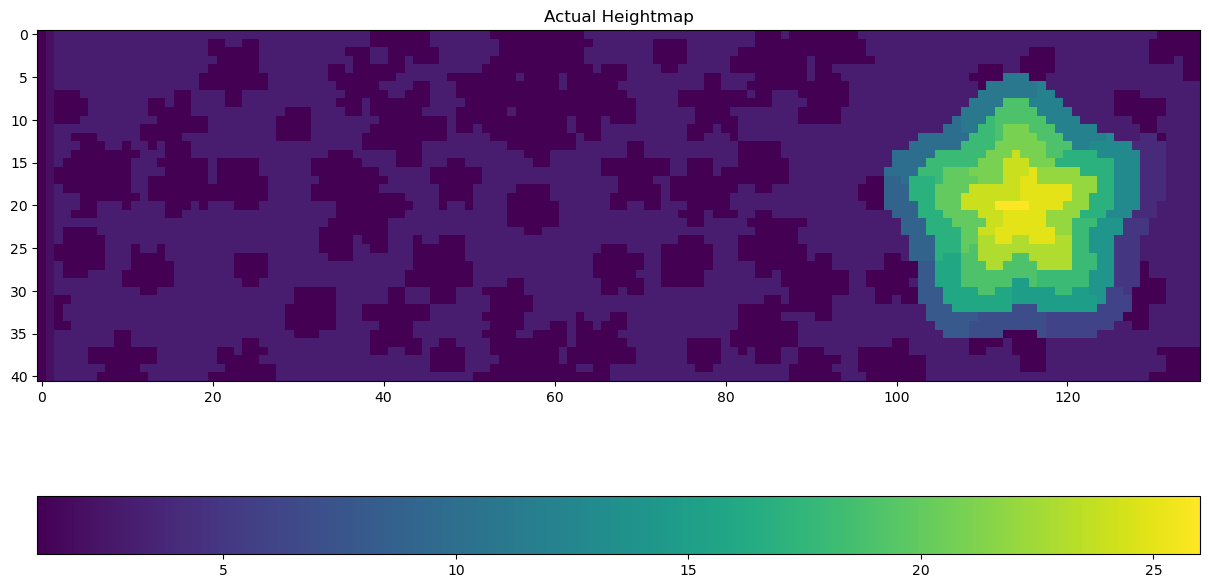

In [30]:
# Plot the graph in a grid with a colormap of each node's elevation
plt.figure(figsize=(15, 10))
# Set the colobar horizontal
plt.title("Actual Heightmap")
plt.imshow(actual_heightmap, cmap="viridis")
plt.colorbar(orientation="horizontal")

In [31]:
# Draw the graph
# nx.draw(G_actual)

In [35]:
# plt.figure(figsize=(20, 30))
# pos = {node: node for node in G_actual.nodes}
# nx.draw_networkx_nodes(G_actual, pos, node_size=2, node_color=[G_actual.nodes[node]["height"] for node in G_actual.nodes], cmap="viridis")
# nx.draw_networkx_edges(G_actual, pos, width=1)
# plt.show()

In [36]:
print(actual_start, actual_end)

(20, 0) (20, 112)


In [37]:
# Find the shortest path from the start to the end
path_actual = nx.shortest_path(G_actual, actual_start, actual_end, weight="height")

In [39]:
# Print the length of the path
print(len(path_actual) - 1)

456


# Part 2

In [64]:
# Find the shortest path from the end to any node with the lowest elevation
paths_all2end = nx.shortest_path(G=G_actual, target=actual_end, weight="height")

# Get the nodes which have the lowest elevation
lowest_nodes = [node for node in paths_all2end if G_actual.nodes[node]["height"] == 1]

# in paths_all2end get the paths for the nodes in lowest_nodes
paths_lowest2end = [paths_all2end[node] for node in lowest_nodes]

# # Get the shortest path from the end to the lowest node
shortest_path_end2lowest = min(paths_lowest2end, key=len)

In [65]:
len(shortest_path_end2lowest) - 1

454